### Build a decision tree model with Python


#### Imports

In [1]:
import pandas  as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### 1- Define the Task

Use life expectancy and long-term unemployment rate to predict the perceived happiness (low or high) of inhabitants of a country




#### 2- Acquire Clean Data

In [3]:
dataset = pd.read_csv("world_data_really_tiny.csv")

#### 3- Understand the data

##### ** Inspect the Data **

In [4]:
dataset.head()

,country,lifeexp,unemployment,happiness
0,Albania,77.6,6.09,Low
1,Bulgaria,75.0,3.24,Low
2,Iran,75.8,2.11,Low
3,Ukraine,71.9,1.53,Low
4,South Africa,61.8,7.52,Low


In [5]:
dataset.shape

(12, 4)

In [6]:
dataset.describe()

,lifeexp,unemployment
count,12.000000,12.000000
mean,74.833333,3.051667
std,5.213328,2.377664
min,61.800000,0.060000
25%,71.900000,1.412500
50%,75.750000,1.820000
75%,77.525000,5.102500
max,81.400000,7.520000


##### ** Visualise **

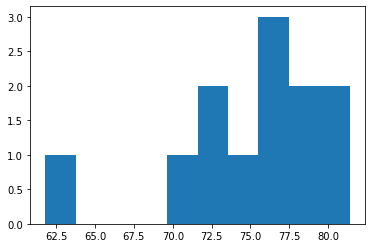

In [7]:
plt.hist(dataset["lifeexp"],bins=10)
plt.show()

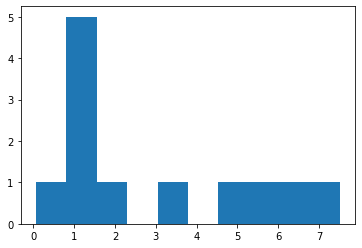

In [8]:
plt.hist(dataset["unemployment"],bins=10)
plt.show()

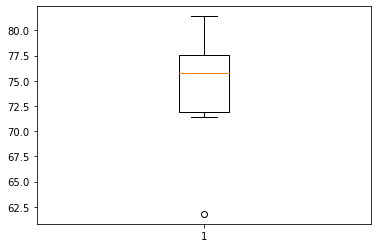

In [9]:
plt.boxplot(dataset["lifeexp"])
plt.show()

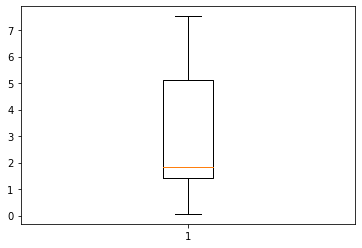

In [10]:
plt.boxplot(dataset["unemployment"])
plt.show()

#### 4- Prepare the Data for Supervised Machine Learning

##### ** Select Features and Split into input and target features **

In [11]:
y = dataset["happiness"]
X = dataset[["lifeexp","unemployment"]]
X.head()


,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
2,75.8,2.11
3,71.9,1.53
4,61.8,7.52


In [12]:
y.head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: happiness, dtype: object

#### 5- Build a Model

##### ** Split Into Training and Test Sets **


In [13]:
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [14]:
X_train

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
11,77.5,0.06
8,80.7,1.36
3,71.9,1.53
6,81.4,1.43
9,75.7,4.96
4,61.8,7.52


In [15]:
y_train

0      Low
1      Low
11    High
8     High
3      Low
6     High
9     High
4      Low
Name: happiness, dtype: object

##### ** Select an Algorithm **


In [16]:
model = DecisionTreeClassifier()


##### ** Fit the model to the data **

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### ** Check the model **

In [18]:
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0


##### 4- Evaluate the Model

##### ** Compute Accuracy Score **


In [19]:
predictions = model.predict(X_test)
predictions

array(['Low', 'High', 'High', 'Low'], dtype=object)

In [20]:
print(accuracy_score(y_test, predictions))


0.5


In [21]:
# Show the model predictions against the orginal data
df = X_test.copy()
df['Actual'] = y_test
df['Prediction'] = predictions
df

,lifeexp,unemployment,Actual,Prediction
7,77.3,5.53,High,Low
10,71.4,1.26,High,High
2,75.8,2.11,Low,High
5,71.9,1.53,Low,Low
